### Importing Libraries 

In [1]:
#Import libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read csv file

df = pd.read_csv("6153757_2_tourism.csv")

In [3]:
# Show first 5 rows information of the each columns by default, we can increase or decrease it by giving parameter values. 

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Understanding Dataset

In [4]:
#Shape of table in form of number of rows and number of columns:(rows,columns);

df.shape

(4888, 20)

In [5]:
# Print all columns names

df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
#Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

## Exploratory Data Analysis

### Ques1)Perform an Exploratory Data Analysis on the data
#### Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

In [7]:
#Count the values of Product Taken

df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

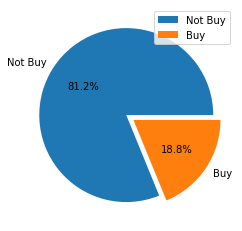

In [8]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = 'Not Buy','Buy'
sizes = [df.ProdTaken[df['ProdTaken'] == 0].count(), df.ProdTaken[df['ProdTaken'] == 1].count()]
explode = (0, 0.1)
plt.pie(sizes, explode = explode, labels = labels, autopct='%.1f%%')
plt.legend()
plt.show()

#### From above pie chart we can say that given data is unbalanced data because the difference between Buy and Not Buy is big.

In [9]:
#Count the value of MaritalStatus

df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

#### From above information we can say that Married Couple Purchase the product most.

In [10]:
#Count the value of Gender

df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

#### From above information we can say that Female and Fe Male is same values.

In [11]:
# So we replace Fe Male to Female

df['Gender'] = df['Gender'].replace({'Fe Male': 'Female'})

In [12]:
# Check the values replace or not.

df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

#### So above value is replaced.

### Ques2) Illustrate the insights based on EDA
#### Key meaningful observations on the relationship between variables.

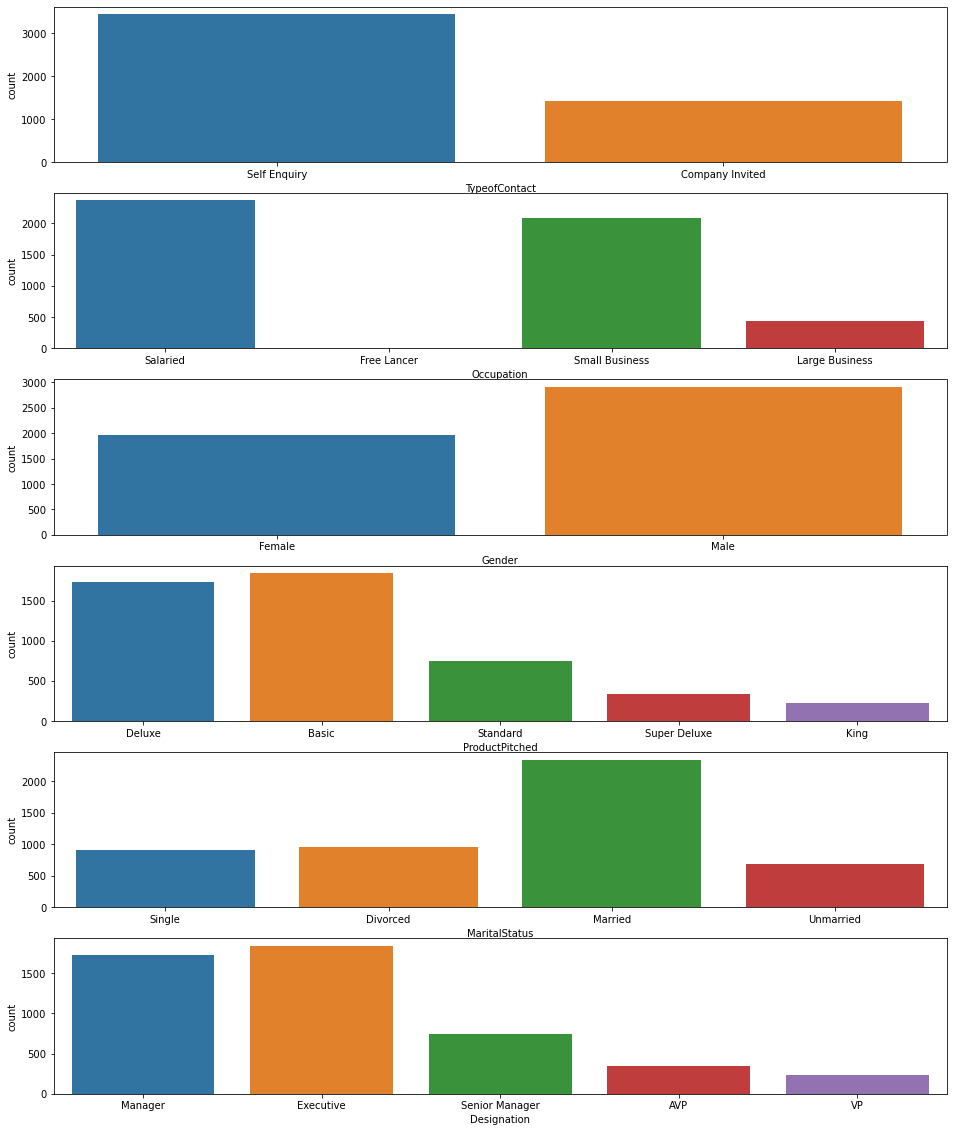

In [13]:
#Compare with Bar graph 

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(16, 20))

cols_ = ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=df, ax=ax[ind])

#### Key Point according to above graphs are as follows:

#### 1) Persons whose TypeofContact is Self Enquiry are Purchased Product in large numbers compare to Company Invited Persons.

#### 2) Persons whose Occupation is Jobs (Salaried) Purchase the Product in large numbers and than small business persons purchase the product in second large number.

#### 3) Males Purchased more Product compare to Female.

#### 4) Most of Person Purchased the Basic Package of Company and than Purchase Deluxe Package in second most.

#### 5) Person whose Marital Status is Married Purchase the most number of Product.

#### 6) Persons with Designation Executive, Manager,  Senior Manager respectively Purchased the most number of Product.

In [14]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

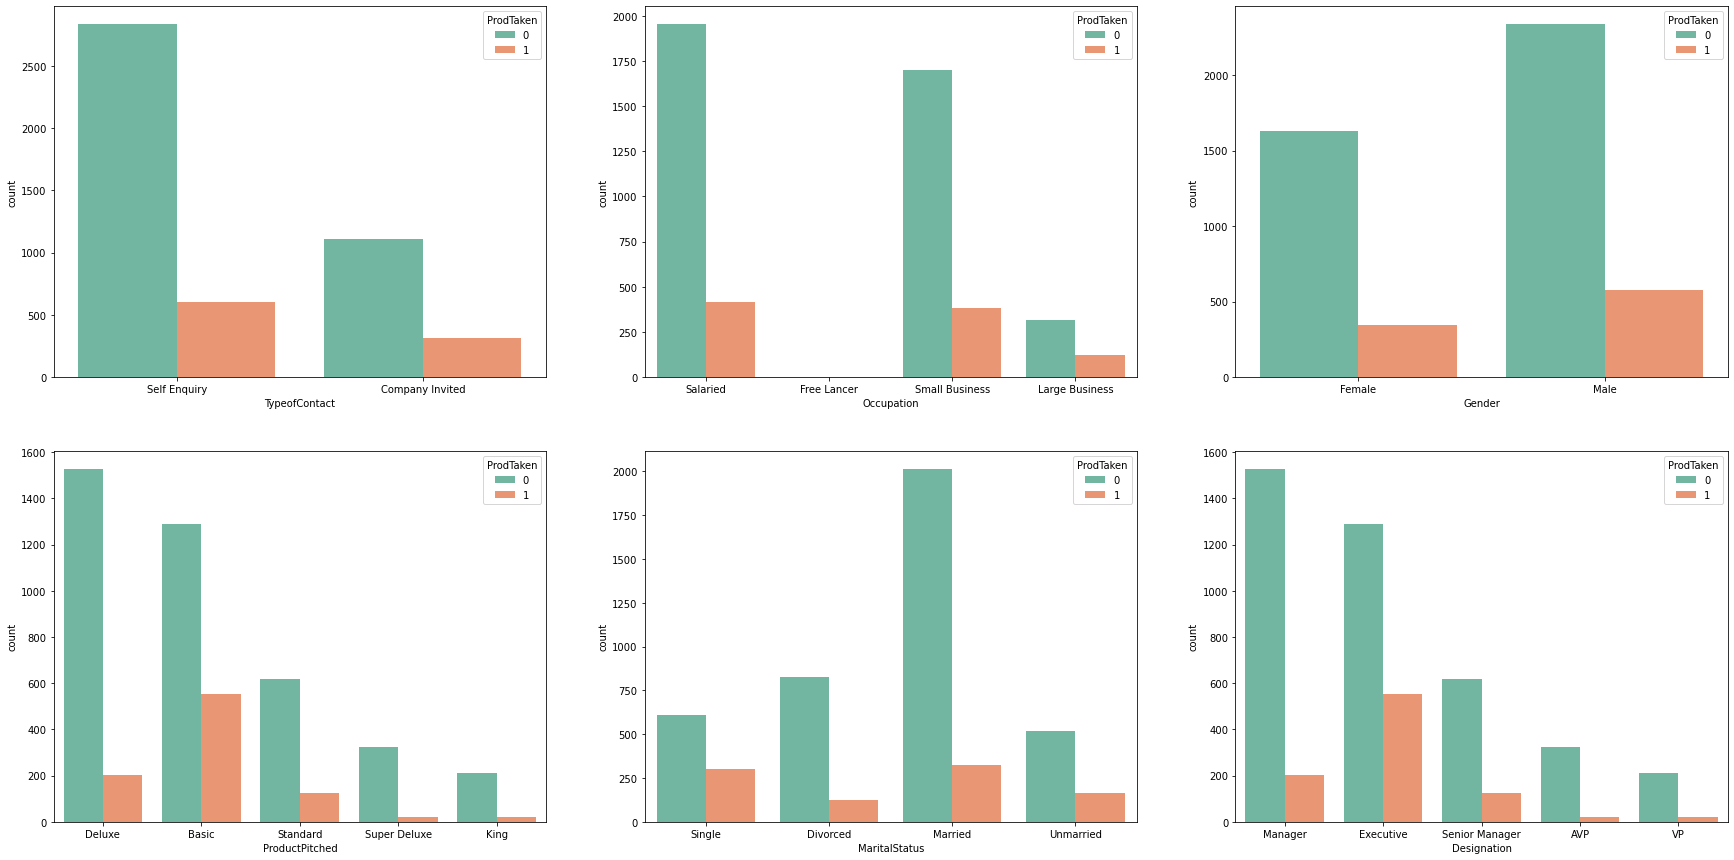

In [15]:
# Count column plots to map the dependence of 'ProdTaken' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='TypeofContact', hue='ProdTaken', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='Occupation', hue='ProdTaken', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='Gender', hue='ProdTaken', data=df, palette='Set2', ax=ax[0][2])
sns.countplot(x='ProductPitched', hue='ProdTaken', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='MaritalStatus', hue='ProdTaken', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Designation', hue='ProdTaken', data=df, palette='Set2', ax=ax[1][2])


plt.show()

#### From above results:

#### 1) On the basis of percentage Company Invited persons Purchase the most Product.

#### 2) Almost same numbers of Person taken Product whose occupation is Salaried based and Small  Business. But in term of Percentage Small Business persons Purchased more Product comparison to Salried Person.

#### 3) Males purchased the more Product.

#### 4) Most of person purchased the Basic package of company  on the basis of percentage and, than purchase Standard package in second most. 

#### 5) Person whose Marital Status is Married purchase the most number of Product. But on the basis of percentage Single person purchased most Product.

#### 6) Persons with Designation Executive Purchased the most number of Product.

### Ques3) Data Pre-processing
#### Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

In [16]:
#Checking Null values

df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [17]:
#Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

<AxesSubplot:xlabel='Age'>

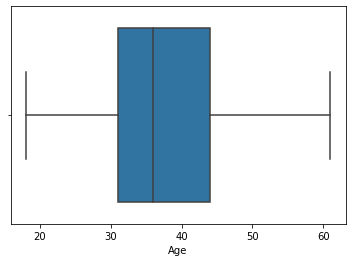

In [18]:
# Checking Outliers

sns.boxplot(df['Age'])

#### No outliers are available in the Age columns

<AxesSubplot:xlabel='MonthlyIncome'>

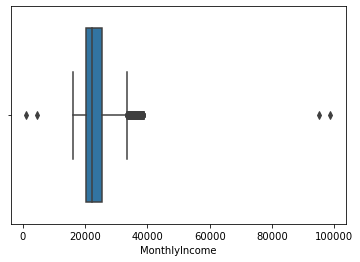

In [19]:
# Checking Outliers

sns.boxplot(df['MonthlyIncome'])

#### Positive and Negative both types of Outliers are available in MonthlyIncome column.

In [20]:
mod_toc = df['TypeofContact'].mode()

In [21]:
mod_toc

0    Self Enquiry
dtype: object

##### From Above information: Self Enquiry person Taken more Product.

In [22]:
# Find the mean and median of according to data.

In [23]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [25]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [26]:
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean())

In [27]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean())

In [28]:
df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].mean())

In [29]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())

In [30]:
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean())

In [31]:
#Check the null values

df.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [32]:
# data heading

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [33]:
# Create a dummy of given data.

df = pd.get_dummies(df)

In [34]:
# New data heading

df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,1,0,0,0,1,0,0
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,...,0,1,0,0,0,0,0,1,0,0
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,1,0,0,1,0,0,0
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,...,0,1,0,0,0,0,1,0,0,0
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,...,0,1,0,0,0,0,1,0,0,0


In [35]:
#New Shape of table

df.shape

(4888, 36)

In [36]:
#Drop CustomerID column because it is not given relevant data for Analysis.

df.drop('CustomerID', axis = 1, inplace = True)

In [37]:
X = df.drop('ProdTaken', axis =1)

In [38]:
y = df.ProdTaken

### Ques4) Model building
#### Build random forest and decision tree.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Decision Tree Classifier

In [42]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = dt_clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [45]:
accuracy_score(y_test, y_pred_dt)

0.8813905930470347

In [46]:
f1_score(y_test,y_pred_dt)

0.6881720430107527

#### From Decision Tree Classifier the Accuracy_score is 88%
#### From Decision Tree Classifier the f1_score is 69%

#### Here f1_score is less.

 ### Random Forest Classifier

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_rf = rf.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred_rf)

0.9202453987730062

In [50]:
f1_score(y_test, y_pred_rf)

0.7607361963190183

#### From Random Forest Classifier the Accuracy_score is 90%
#### From Random Forest Classifier the f1_score is 71%

#### Here f1_score is also less.

### Ques.5)Model performance evaluation and improvement:- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

### We find out the given data is unbalanced data from above pie chart. And in unbalanced dataset accuracy_score is not a right metric to check the model performance. Because in case of unbalnce dataset we already have a bias distribution of the classes.So, if our dataset is unbalance, be check the model performance with the help of f1_score , precission or recall. So firstly done balance the dataset.

### Balance the Imbalaced Data with SMOTE

In [51]:
# Install imblearn

!pip install imblearn

In [52]:
# values of y

y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [53]:
# Import SMOTE

from imblearn.over_sampling import SMOTE

In [54]:
sm = SMOTE(random_state = 2)
X_sm, y_sm = sm.fit_resample(X, y)

In [55]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=23)

#### Now our data is balanced from SMOTE Technique.

### Now again Decision Tree Classifier on Balanced Data

In [56]:
dt_clf_sm = DecisionTreeClassifier()
dt_clf_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [57]:
y_pred_dt_sm = dt_clf.predict(X_test_sm)

In [58]:
accuracy_score(y_test_sm, y_pred_dt_sm)

0.743073047858942

In [59]:
dt_f1 = f1_score(y_test_sm, y_pred_dt_sm)

### And again Random Forest Classifier on Balanced Data

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [61]:
y_pred_rf_sm = rf.predict(X_test_sm)

In [62]:
accuracy_score(y_test_sm, y_pred_rf_sm)

0.9596977329974811

In [63]:
rf_f1 = f1_score(y_test_sm, y_pred_rf_sm)

### Ques6) Model building - Boosting
#### Build Adaboost, gradient boost, xgboost and stacking classifier.

### AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(X_train_sm, y_train_sm)

In [66]:
y_pred_ada = ada_clf.predict(X_test_sm)

In [67]:
accuracy_score(y_test_sm, y_pred_ada)

0.871536523929471

In [68]:
ad_f1 = f1_score(y_test_sm, y_pred_ada)

### Gradient boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc = GradientBoostingClassifier()

In [71]:
gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier()

In [72]:
pred_gb = gbc.predict(X_test_sm)

In [73]:
accuracy_score(y_test_sm, pred_gb)

0.8942065491183879

In [74]:
gb_f1 = f1_score(y_test_sm, pred_gb)

### XGBoost Classifier

In [75]:
#Install xgboost

!pip install xgboost

In [76]:
#Import XGBClassifier

from xgboost import XGBClassifier

In [77]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_sm, y_train_sm)

[09:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
preds = xgb_clf.predict(X_test_sm)

In [79]:
accuracy_score(y_test_sm, preds)

0.9521410579345088

In [80]:
xg_f1 = f1_score(y_test_sm, preds)

### Stacking Classifier

In [81]:
#Install mlxtend

!pip install mlxtend

In [82]:
#Import Libraries

from sklearn import model_selection
from mlxtend.classifier import StackingClassifier

import numpy as np

import warnings
warnings.simplefilter('ignore')

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GradientBoostingClassifier()
xgb = XGBClassifier()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=xgb)

In [83]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['AdaBoost', 
                       'Random Forest', 
                       'Gradient Boosting',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train_sm, y_train_sm,
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.01) [AdaBoost]
Accuracy: 0.95 (+/- 0.00) [Random Forest]
Accuracy: 0.90 (+/- 0.01) [Gradient Boosting]
[09:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

### 7)Model performance evaluation and improvement
#### Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

### Random Forest Classifier on Balanced Data and XGBoost Classifier is gives the right performance evaluation.

### 8)Actionable Insights & Recommendations
#### Compare models - Business recommendations and insights

### Comparison of different Models based on Performance

In [84]:
#Getting accuracy and log loss for each model
model_data = pd.DataFrame({'Classifiers' : ['DecisionTreeClassifier', 'RandomForest Classifier', 'XGBoost Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier'],
                        'F1-score' : [dt_f1,rf_f1,xg_f1,ad_f1, gb_f1]})

In [85]:
model_data

,Classifiers,F1-score
0,DecisionTreeClassifier,0.673600
1,RandomForest Classifier,0.959545
2,XGBoost Classifier,0.952141
3,AdaBoost Classifier,0.869231
4,Gradient Boosting Classifier,0.890767


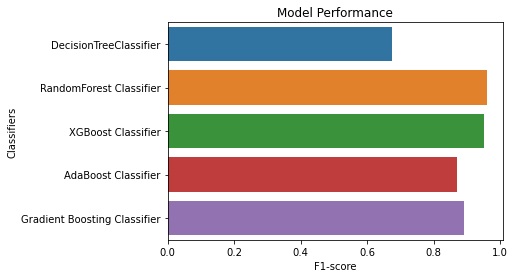

In [86]:
#Visualizing the accuracy and log loss of each model
sns.barplot(data = model_data, x = model_data['F1-score'], y = model_data.Classifiers)
plt.title('Model Performance')
plt.show()